# Seyed Ali Mirferdos
# 99201465


# 0. Importing the necessary modules

In [21]:
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils.extmath import randomized_svd

In [ ]:
gorbe_file_path = '/content/drive/MyDrive/gorbe.jpg'
import numpy as np

# 1. Reading the image to numpy

In [4]:
!wget https://i.imgflip.com/w414e.jpg

--2021-05-21 13:49:12--  https://i.imgflip.com/w414e.jpg
Resolving i.imgflip.com (i.imgflip.com)... 104.18.255.14, 104.18.64.15
Connecting to i.imgflip.com (i.imgflip.com)|104.18.255.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71943 (70K) [image/jpeg]
Saving to: ‘w414e.jpg’

w414e.jpg           100%[===================>]  70.26K  --.-KB/s    in 0.002s  

2021-05-21 13:49:12 (43.9 MB/s) - ‘w414e.jpg’ saved [71943/71943]



In [22]:
gorbe_the_great = np.asarray(Image.open('w414e.jpg'))

In [23]:
gorbe_the_great.shape

(600, 897, 3)

# 2. SVD Decomposition

In [12]:
def truncated_svd(mat, n_components):
  return randomized_svd(mat, 
                        n_components=n_components,
                        random_state=None)

# 3. Compressing each channel

In [14]:
n_components = 15

In [15]:
compressed_svds = []

for i in range(3):
  compressed_svds.append(truncated_svd(gorbe_the_great[:, :, i], n_components))

# 4. Reconstructing the image

In [17]:
def reconstruct(U , Sigma , VT):
  return np.array(U @ np.diag(Sigma) @ VT).astype(np.uint8)

In [18]:
reconstructed_gorbe = []

for i in range(3):
  reconstructed_gorbe.append(reconstruct(*compressed_svds[i]))

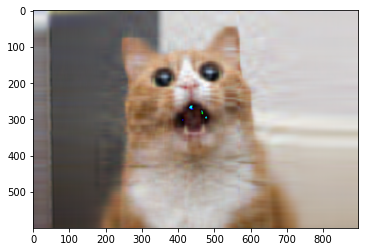

In [20]:
another_gorbe = np.dstack(reconstructed_gorbe)
plt.imshow(another_gorbe)
plt.show()

# 5. Running the compression with different values

In [24]:
dims_file_sizes = {}

In [ ]:
for i in range(1, min(gorbe_the_great.shape[0], gorbe_the_great.shape[1]), 10):
  compressed_svds = [truncated_svd(gorbe_the_great[:, :, c], i) for c in range(3)]

  reconstructed_gorbe = [reconstruct(*compressed_svds[c]) for c in range(3)]

  print(i)
  another_gorbe = np.dstack(reconstructed_gorbe)
  plt.imshow(another_gorbe)
  plt.show()

  img = Image.fromarray(another_gorbe)
  img.save("gorbe_khare.jpeg")
  file_size = os.path.getsize("gorbe_khare.jpeg")
  dims_file_sizes[i] = file_size

# 6. Plotting the filesize vs. dimensions

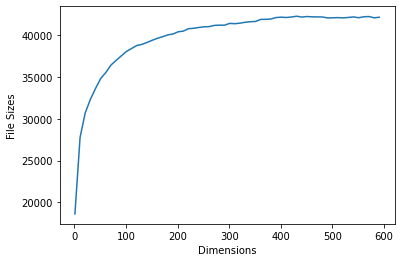

In [ ]:
dims = list(dims_file_sizes.keys())
files_sizes = list(dims_file_sizes.values())

plt.plot(dims, files_sizes)
 
plt.xlabel("Dimensions")
plt.ylabel("File Sizes")
plt.show()